# Clustering Analysis

## Data Exploration & Identification of Relevant Attributes

### Load the dataset and explore its structure. 

In [234]:
import pandas as pd

# Load the data from the Excel file
df = pd.read_csv("D:\school\BAMA517\wholesale+customers\Wholesale customers data.csv")

# Display the first few rows of the data to understand its structure
df.head(10)


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185
5,2,3,9413,8259,5126,666,1795,1451
6,2,3,12126,3199,6975,480,3140,545
7,2,3,7579,4956,9426,1669,3321,2566
8,1,3,5963,3648,6192,425,1716,750
9,2,3,6006,11093,18881,1159,7425,2098


In [235]:
df.shape

(440, 8)

In [236]:
df.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


### Examine the distribution of features.

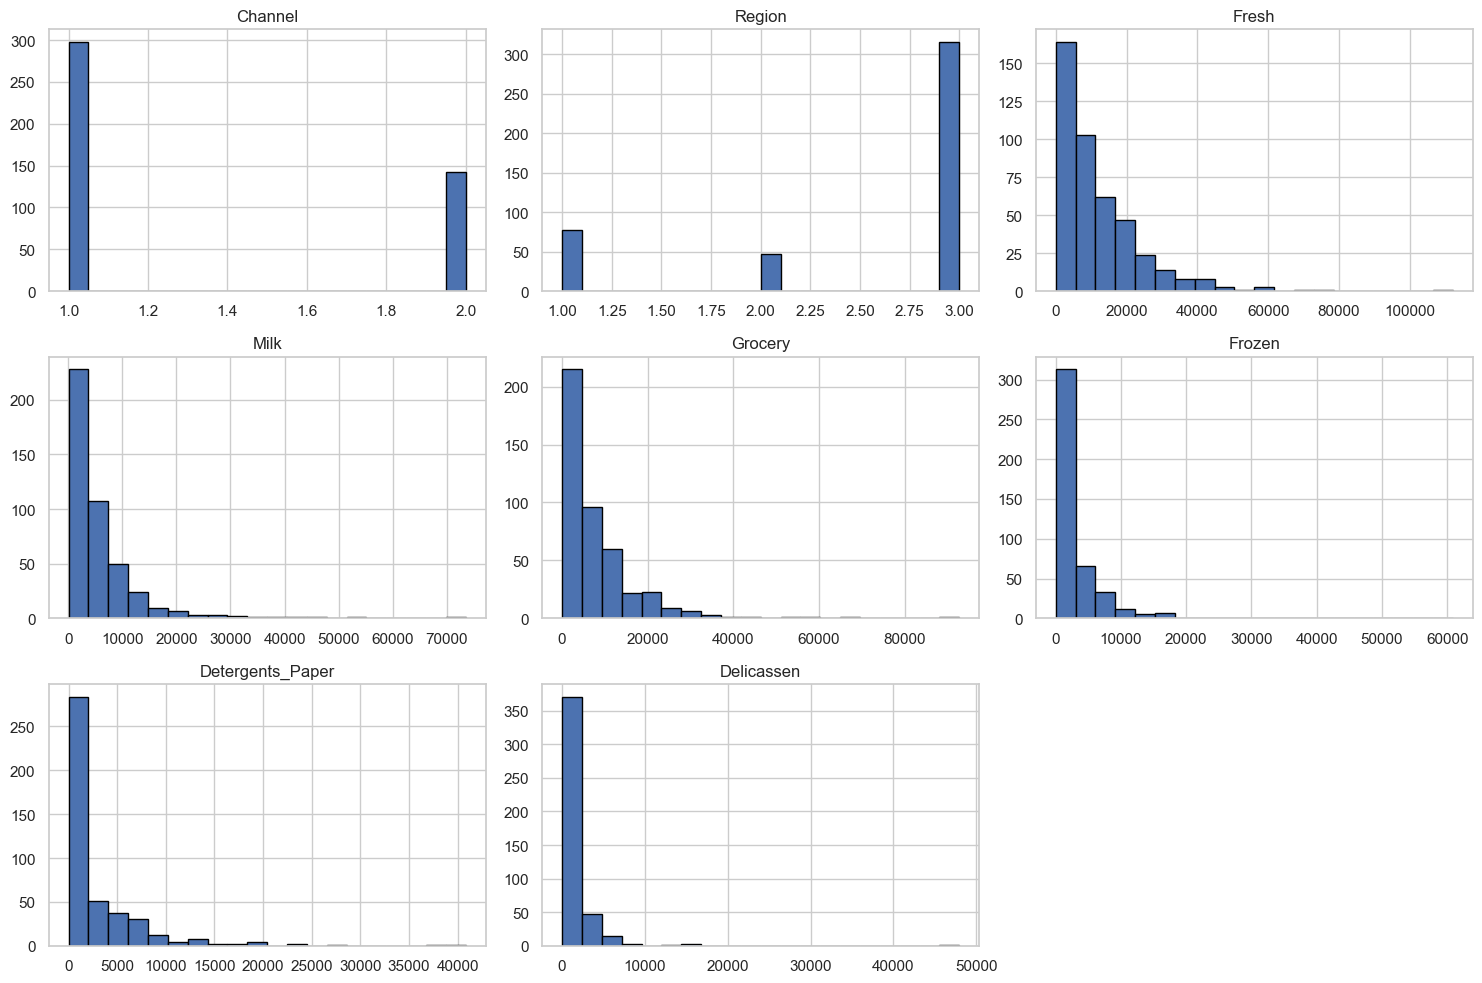

In [237]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the aesthetics for the plots
sns.set(style="whitegrid")

# Plot histograms for each feature to examine the distribution of features.
plt.figure(figsize=(15, 10))
for i, column in enumerate(df.columns):
    plt.subplot(3, 3, i + 1)
    plt.hist(df[column], bins=20, edgecolor='black')
    plt.title(column)
plt.tight_layout()
plt.show()


The distributions of all features are roughly centered around zero.
Most features show a somewhat skewed distribution, indicating the presence of outliers or heavy tails in the data.

### Check for missing values or outliers

In [238]:
missing_values = df.isnull().sum()
missing_values


Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

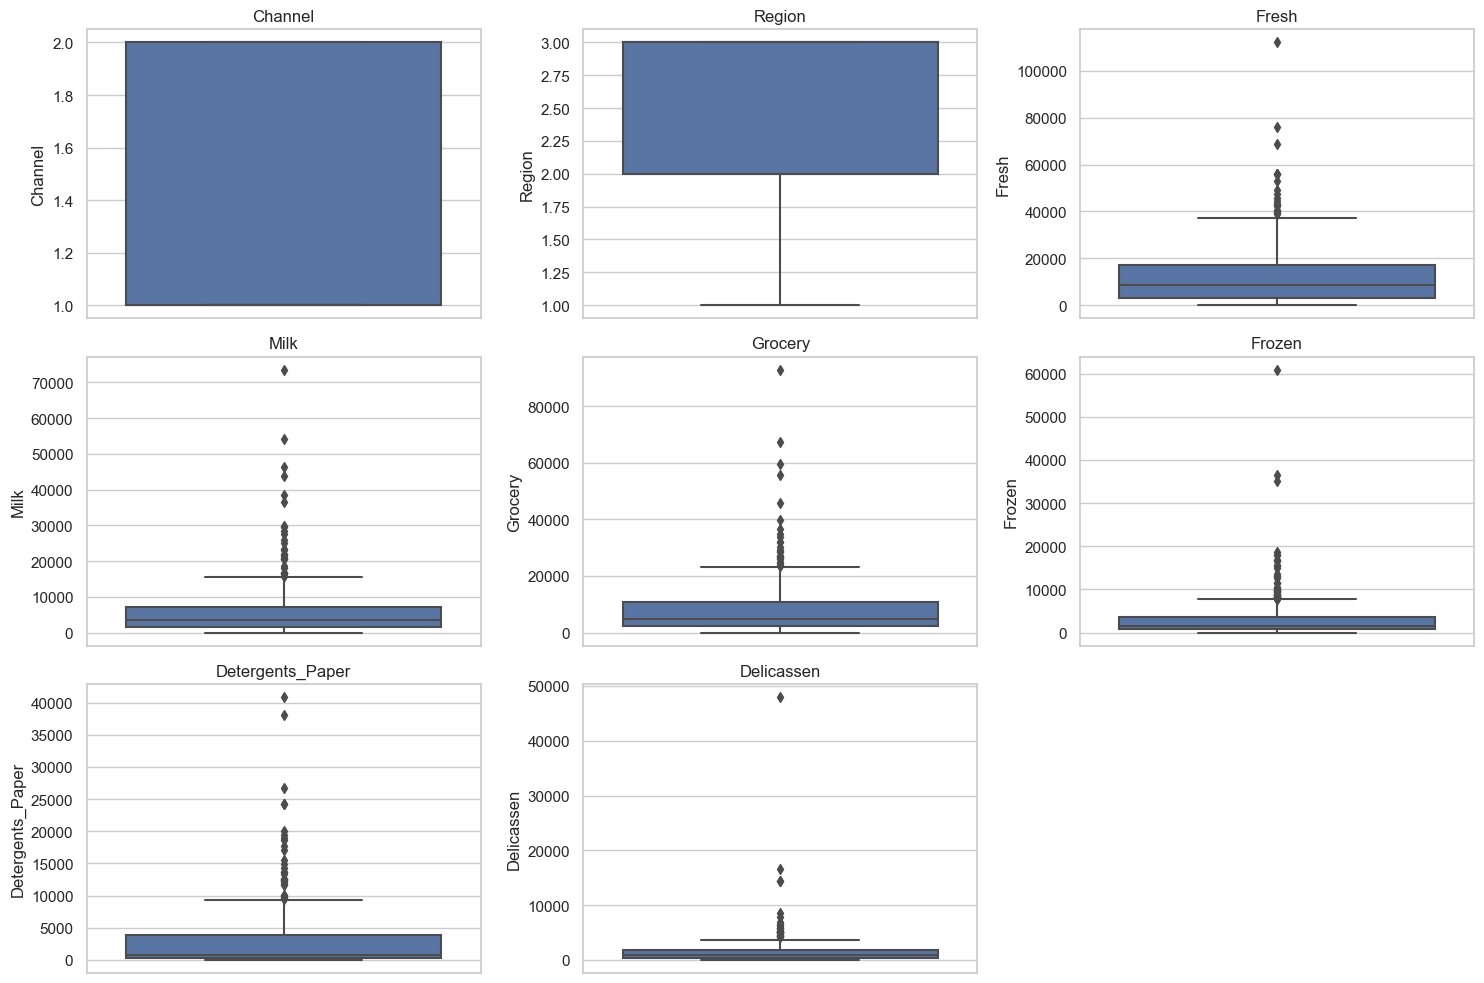

In [239]:
# Plot histograms for each feature to check for outliers

plt.figure(figsize=(15, 10))
for i, column in enumerate(df.columns):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(y=df[column])
    plt.title(column)
plt.tight_layout()
plt.show()

From the plots, we can see that there are quite some outliers for each of the attribute. We should cap the outliers that is 1.5 times the IQR higher than Q3 and lower than Q1, since it can have a significant impact on the results of k-means clustering, as the algorithm is sensitive to extreme values.

In [240]:
from scipy import stats
import numpy as np

# cap outliers using IQR
for column in df.columns:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[column] = np.where(df[column] < lower_bound, lower_bound, df[column])
    df[column] = np.where(df[column] > upper_bound, upper_bound, df[column])



df.describe()  # Displaying the summary statistics of the capped data   



,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.00000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,11357.568182,5048.592045,7236.37500,2507.085795,2392.616477,1266.715341
std,0.468052,0.774272,10211.542235,4386.377073,6596.53308,2408.297738,2940.794090,1083.069792
min,1.000000,1.000000,3.000000,55.000000,3.00000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.00000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.50000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.75000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,37642.750000,15676.125000,23409.87500,7772.250000,9419.875000,3938.250000


## Feature Scaling 

### Perform feature scaling if necessary to standardize the variables. 

categorical variables are discrete and do not have any natural origin. So computing euclidean distance for such as space is not meaningful.

In [241]:
from sklearn.preprocessing import StandardScaler

# Selecting only the continuous features for standardization
continuous_features = df[['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']]

# Standardizing the data
scaler = StandardScaler()
Scaled_data = scaler.fit_transform(continuous_features)

# Creating a new DataFrame for the scaled data
Scaled_df = pd.DataFrame(Scaled_data, columns= continuous_features.columns)
Scaled_df.head()



,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,0.128573,1.051586,0.049267,-0.953244,0.095792,0.065892
1,-0.421627,1.086735,0.353865,-0.309735,0.306519,0.470759
2,-0.490647,0.858040,0.067935,-0.042437,0.382435,2.469440
3,0.187004,-0.879308,-0.457635,1.619962,-0.641923,0.481851
4,1.103677,0.082487,-0.005824,0.585275,-0.209575,2.469440


## K-means Clustering

### Experiment with different values of K (number of clusters) and state the number of K of your choice.

d:\ANACONDA\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
d:\ANACONDA\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
d:\ANACONDA\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
d:\ANACONDA\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid i

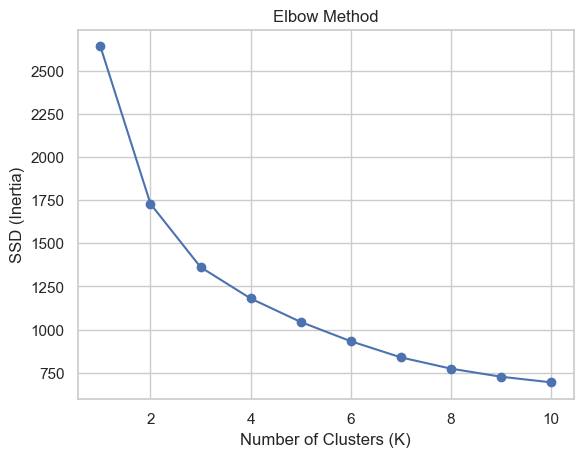

In [242]:
# Using Elbow Method to Find Optimal K

from sklearn.cluster import KMeans
# Calculate SSD (Inertia) for different values of k
ssd = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42) #random_state is used to ensure consistent output
    kmeans.fit(Scaled_df)
    ssd.append(kmeans.inertia_)

# Plot the elbow curve
plt.plot(range(1, 11), ssd, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('SSD (Inertia)')
plt.show()



### Apply K-means clustering algorithm on the dataset.

From the graph, it appears there's a noticeable 'elbow' around 3 - 4 clusters. Beyond this point, the decrease in inertia becomes more gradual, suggesting that adding more clusters does not significantly improve the fit. Therefore, try both 3 and 4 clusters and compare.

In [243]:
# Try cluster of 4
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(Scaled_df)
# Adding cluster labels to the original data
df['cluster'] = kmeans.labels_
# Grouping data by clusters and calculating mean values
clustered_data = df.groupby('cluster').mean()
clustered_data


d:\ANACONDA\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
d:\ANACONDA\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
cluster,,,,,,,,
0,1.309859,2.633803,24505.492958,6648.426056,7875.026408,3485.285211,1703.617958,2727.901408
1,1.120192,2.538462,8928.867788,2681.442308,3694.230769,1417.067308,972.644231,710.673077
2,1.938144,2.515464,5701.948454,10270.682990,16910.382732,1377.649485,7121.622423,1484.213918
3,1.062500,2.500000,13236.664062,3052.281250,3377.671875,6676.257812,604.484375,1123.203125


Visualize the clusters

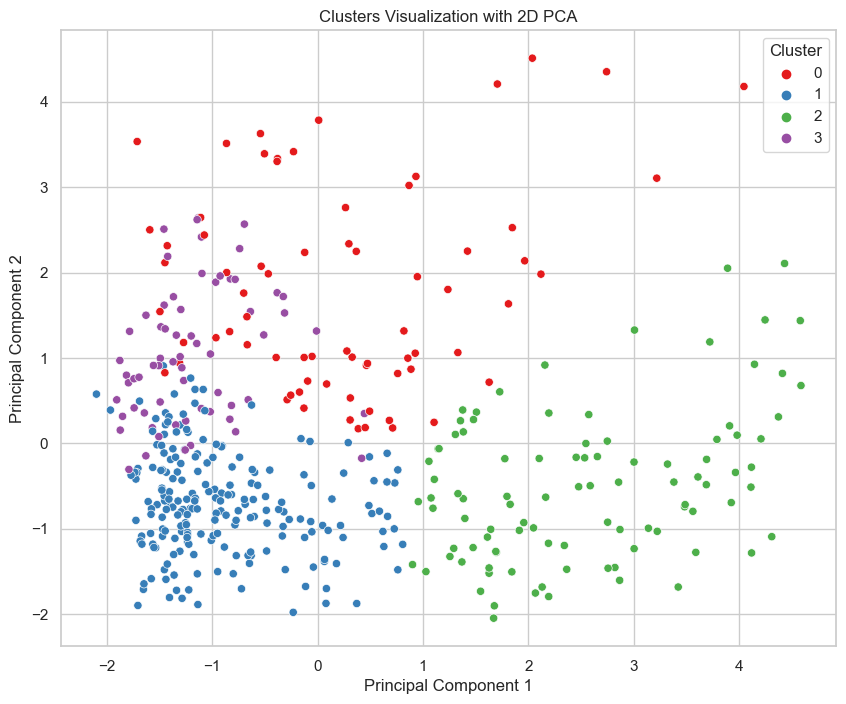

In [244]:
from sklearn.decomposition import PCA

# Apply PCA for Dimensionality Reduction and combine PCA Results with Cluster Labels:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(Scaled_data)

# Creating a DataFrame for plotting
pca_df = pd.DataFrame(data=pca_result, columns=['PCA1', 'PCA2'])
pca_df['Cluster'] = kmeans.labels_

# Plotting
plt.figure(figsize=(10, 8))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', data=pca_df, palette='Set1')
plt.title('Clusters Visualization with 2D PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.show()


In [245]:
# Try cluster of 3
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(Scaled_df)
# Adding cluster labels to the original data
df['cluster'] = kmeans.labels_
# Grouping data by clusters and calculating mean values
clustered_data = df.groupby('cluster').mean()
clustered_data


d:\ANACONDA\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
d:\ANACONDA\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
cluster,,,,,,,,
0,1.933333,2.552381,6836.635714,10378.863095,16709.380952,1502.030952,6917.030952,1636.800000
1,1.136752,2.529915,8573.331197,2792.363248,3761.841880,1707.287393,1013.854701,807.785256
2,1.118812,2.564356,22508.155941,4734.523515,5438.108911,5404.943069,883.376238,1945.237624


Visualize the clusters

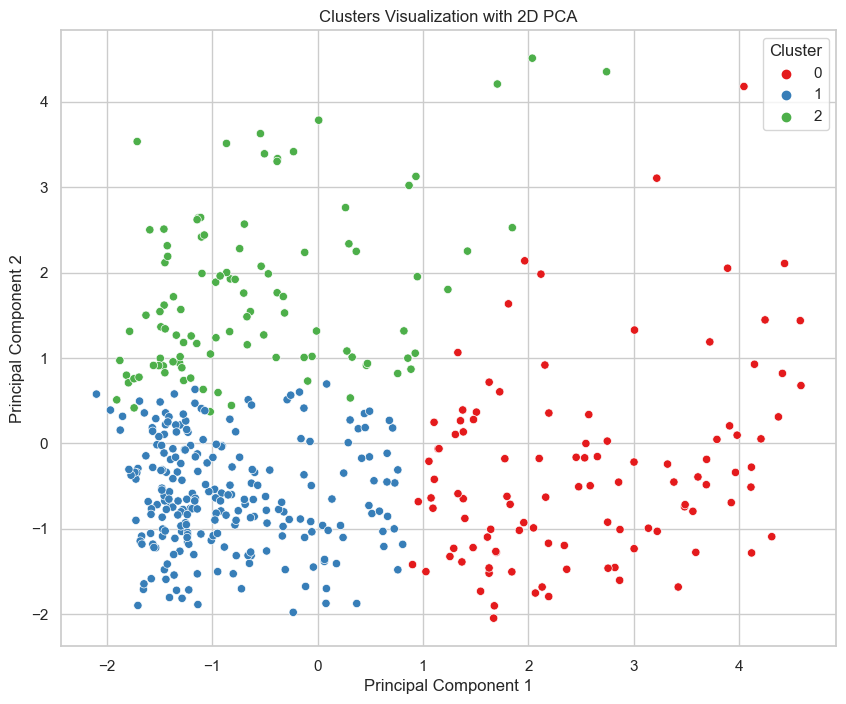

In [246]:
from sklearn.decomposition import PCA

# Apply PCA for Dimensionality Reduction and combine PCA Results with Cluster Labels:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(Scaled_data)

# Creating a DataFrame for plotting
pca_df = pd.DataFrame(data=pca_result, columns=['PCA1', 'PCA2'])
pca_df['Cluster'] = kmeans.labels_

# Plotting
plt.figure(figsize=(10, 8))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', data=pca_df, palette='Set1')
plt.title('Clusters Visualization with 2D PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.show()


Comparing the visualizaiton of 3 and 4 clusters, the clusters in 3 clusters look clearly. Therefore, it is optimal to use 3 clusters.

## Analysis and Interpretation

Based on the clustering results with 3 clusters, we can observe distinct spending patterns among the different clusters.

Cluster 0:

High spending on 'Milk', 'Grocery', and 'Detergents_Paper'. Close to 2 for Channel which might indicates that customer's Channel might to be retail, however, categorical variables are discrete and do not have any natural origin. So computing euclidean distance for such as space is not meaningful.
This pattern suggests a segment focused on everyday household and grocery items, likely representing retail stores or supermarkets.

Cluster 1:

Lower spending across all categories, especially on 'Milk', 'Grocery', and 'Detergents_Paper'.  Close to 1 for Channel which might indicates that customer's Channel might be catering industry, however, categorical variables are discrete and do not have any natural origin. So computing euclidean distance for such as space is not meaningful.
This could represent smaller scale customers like small businesses or individual buyers.

Cluster 2:

Very high spending on 'Fresh', moderate on 'Milk', 'Grocery', and 'Delicassen', and relatively high on 'Frozen'. Close to 1 for Channel which might indicates that customer's Channel is might be catering industy,  however, categorical variables are discrete and do not have any natural origin. So computing euclidean distance for such as space is not meaningful.
This cluster might represent larger establishments such as restaurants, hotels, or large-scale caterers that require a broad range of fresh and frozen products.

